#### Exercici 2
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

[->PRE-PROCESSING-DATA/movies.dat'](https://github.com/BIDDL3/PRE-PROCESSING-DATA)

> Important!
El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [1]:
import pandas as pd
import re


movies = pd.read_csv('movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'], 
                 engine='python', encoding='iso-8859-1')


In [2]:
movies.shape

(3883, 3)

In [3]:
movies.columns

Index(['movie_id', 'title', 'genres'], dtype='object')

In [4]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#Separació títol i any
patron = r'\((\d{4})\)'
movies['any'] = movies['title'].str.extract(patron)
movies['title'] = movies['title'].str.replace(patron, '').str.strip()

print(movies)


      movie_id                        title                        genres  \
0            1                    Toy Story   Animation|Children's|Comedy   
1            2                      Jumanji  Adventure|Children's|Fantasy   
2            3             Grumpier Old Men                Comedy|Romance   
3            4            Waiting to Exhale                  Comedy|Drama   
4            5  Father of the Bride Part II                        Comedy   
...        ...                          ...                           ...   
3878      3948             Meet the Parents                        Comedy   
3879      3949          Requiem for a Dream                         Drama   
3880      3950                    Tigerland                         Drama   
3881      3951             Two Family House                         Drama   
3882      3952               Contender, The                Drama|Thriller   

       any  
0     1995  
1     1995  
2     1995  
3     1995  
4     1995

/tmp/ipykernel_144/3131049386.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['title'] = movies['title'].str.replace(patron, '').str.strip()


In [6]:
#Selecció gènere
movies['genere'] = movies['genres'].str.split('|').str[0]

print(movies)

      movie_id                        title                        genres  \
0            1                    Toy Story   Animation|Children's|Comedy   
1            2                      Jumanji  Adventure|Children's|Fantasy   
2            3             Grumpier Old Men                Comedy|Romance   
3            4            Waiting to Exhale                  Comedy|Drama   
4            5  Father of the Bride Part II                        Comedy   
...        ...                          ...                           ...   
3878      3948             Meet the Parents                        Comedy   
3879      3949          Requiem for a Dream                         Drama   
3880      3950                    Tigerland                         Drama   
3881      3951             Two Family House                         Drama   
3882      3952               Contender, The                Drama|Thriller   

       any     genere  
0     1995  Animation  
1     1995  Adventure  
2  

In [7]:
#Eliminar columnes

movies = movies.drop(['genres'], axis=1)
movies = movies.drop(['movie_id'], axis=1)
print(movies)

                            title   any     genere
0                       Toy Story  1995  Animation
1                         Jumanji  1995  Adventure
2                Grumpier Old Men  1995     Comedy
3               Waiting to Exhale  1995     Comedy
4     Father of the Bride Part II  1995     Comedy
...                           ...   ...        ...
3878             Meet the Parents  2000     Comedy
3879          Requiem for a Dream  2000      Drama
3880                    Tigerland  2000      Drama
3881             Two Family House  2000      Drama
3882               Contender, The  2000      Drama

[3883 rows x 3 columns]


In [8]:
#Canviar el nom de la columna

movies = movies.rename(columns={'title': 'nom de la pel·lícula'})
print(movies)

             nom de la pel·lícula   any     genere
0                       Toy Story  1995  Animation
1                         Jumanji  1995  Adventure
2                Grumpier Old Men  1995     Comedy
3               Waiting to Exhale  1995     Comedy
4     Father of the Bride Part II  1995     Comedy
...                           ...   ...        ...
3878             Meet the Parents  2000     Comedy
3879          Requiem for a Dream  2000      Drama
3880                    Tigerland  2000      Drama
3881             Two Family House  2000      Drama
3882               Contender, The  2000      Drama

[3883 rows x 3 columns]


##### Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

He seleccionat una gràfica de barres

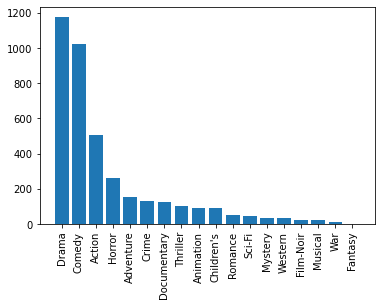

In [9]:
import matplotlib.pyplot as plt

# df amb el nombre de pel·lícules per gènere
num_pelis_per_genere = movies['genere'].value_counts().to_frame().reset_index()
num_pelis_per_genere.columns = ['genere', 'num_pelis']

# Gràfic de barres
plt.bar(x=num_pelis_per_genere['genere'], height=num_pelis_per_genere['num_pelis'])
plt.xticks(rotation=90)
plt.show()


He escollit fer una primera representació amb un gràfic de barres sobre el nombre de películes de cada gènere que es recullen al dataframe 'Movies'. A continuació ho tornat a representar el nombre de pel·lícules amb un BubbleChart que permet fer una visualització més animada i conèixer amb precisió el nombre de films de cada gènere.

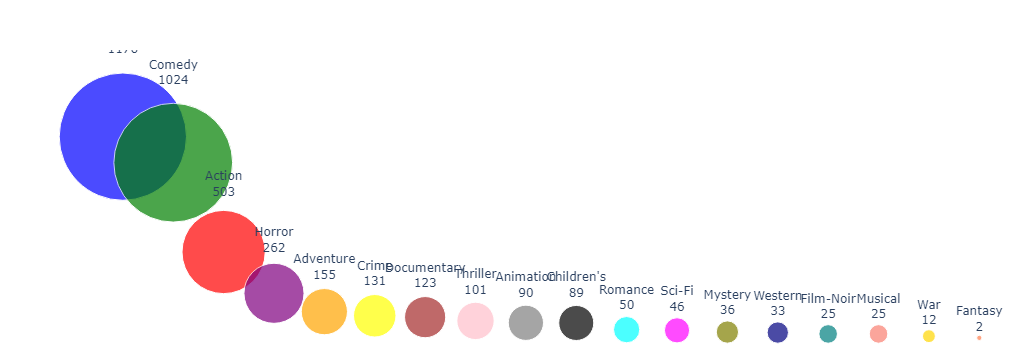

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the DataFrame by 'genre' and compute the count
genre_counts = movies['genere'].value_counts()

# Nou dataframe
data = pd.DataFrame({'Genere': genre_counts.index, 'Count': genre_counts.values})

# Llista d'etiquetes per les bombolles
data['label'] = [i+'<br>'+str(j) for i, j in zip(data['Genere'], data['Count'])]

colors = {
    'Action': 'blue',
    'Adventure': 'green',
    'Animation': 'red',
    'Children\'s': 'purple',
    'Comedy': 'orange',
    'Crime': 'yellow',
    'Documentary': 'brown',
    'Drama': 'pink',
    'Fantasy': 'gray',
    'Film-Noir': 'black',
    'Horror': 'cyan',
    'Musical': 'magenta',
    'Mystery': 'olive',
    'Romance': 'navy',
    'Sci-Fi': 'teal',
    'Thriller': 'salmon',
    'War': 'gold',
    'Western': 'coral'
}

import plotly.express as px
fig = px.scatter(data, x='Genere', y='Count',
                 color='Genere', color_discrete_sequence=list(colors.values()),
                 size='Count', text='label', size_max=90
                )
fig.update_layout(width=900, height=320,
                  margin=dict(t=50, l=0, r=0, b=0),
                  showlegend=False
                 )
fig.update_traces(textposition='top center')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False, tickangle=45)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
fig.update_layout(autosize=False, width=1050, height=300, hovermode='closest')
fig.update_yaxes(showticklabels=False, showgrid=False, zeroline=False, visible=False)
fig.show()

![BubbleChart](newplot.png)